### **Step we need to follow:**
  
      1. Check the null value of both train and test columns
      2. Remove the columns which have null values more than 50 %
      3. Fill the null value with proper requirements. 
      4. Fill missing value for int and object type
      5. Encode object type data
      6. Apply machine learning algorithm
      7. predict the result
      8. Check the result
    

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

# Dataset Checking

In [3]:
len(train)

1460

In [4]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
dataset = [train,test]
for item in dataset:
    print(item.shape)

(1460, 81)
(1459, 80)


## Null Value Check

In [6]:
len(train.columns)

81

In [7]:
col = train.columns
valid_col = []
null_col= []
for i in col:
    x = train[i].isnull().sum()
    if x > 0:
        null_col.append(i)
    else:
        valid_col.append(i)    

In [8]:
print("Total rows : ", len(train))
print("Non Null Columns : ", len(valid_col))
print("Null columns : ",  len(null_col))

Total rows :  1460
Non Null Columns :  62
Null columns :  19


In [9]:
null_col

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
for i in null_col:
    print(i, "=",  train[i].isnull().sum())

LotFrontage = 259
Alley = 1369
MasVnrType = 8
MasVnrArea = 8
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinType2 = 38
Electrical = 1
FireplaceQu = 690
GarageType = 81
GarageYrBlt = 81
GarageFinish = 81
GarageQual = 81
GarageCond = 81
PoolQC = 1453
Fence = 1179
MiscFeature = 1406


In [11]:
train.drop(['Id','Alley','PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [12]:
col = test.columns
valid_col = []
null_col= []
for i in col:
    x = test[i].isnull().sum()
    if x > 0:
        null_col.append(i)
    else:
        valid_col.append(i)    

In [13]:
print("Total rows : ", len(test))
print("Non Null Columns : ", len(valid_col))
print("Null columns : ",  len(null_col))

Total rows :  1459
Non Null Columns :  47
Null columns :  33


In [14]:
null_col

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [15]:
for i in null_col:
    print(i, "=",  test[i].isnull().sum())

MSZoning = 4
LotFrontage = 227
Alley = 1352
Utilities = 2
Exterior1st = 1
Exterior2nd = 1
MasVnrType = 16
MasVnrArea = 15
BsmtQual = 44
BsmtCond = 45
BsmtExposure = 44
BsmtFinType1 = 42
BsmtFinSF1 = 1
BsmtFinType2 = 42
BsmtFinSF2 = 1
BsmtUnfSF = 1
TotalBsmtSF = 1
BsmtFullBath = 2
BsmtHalfBath = 2
KitchenQual = 1
Functional = 2
FireplaceQu = 730
GarageType = 76
GarageYrBlt = 78
GarageFinish = 78
GarageCars = 1
GarageArea = 1
GarageQual = 78
GarageCond = 78
PoolQC = 1456
Fence = 1169
MiscFeature = 1408
SaleType = 1


In [16]:
test.drop(['Id','Alley','PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [17]:
train.shape

(1460, 76)

In [18]:
test.shape

(1459, 75)

In [19]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


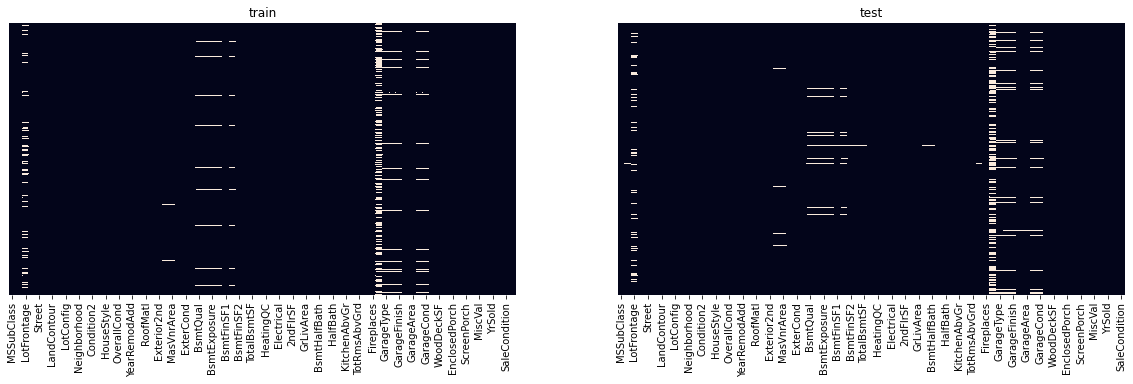

In [21]:
plt.figure(figsize=(20,5)) # set figure size 20 width 5 height
plt.subplot(1,2,1) # create subplot 1 rows, 2 columns and 1 no position
sns.heatmap(train.isnull(),yticklabels=False,cbar=False);
plt.title('train');
plt.subplot(1,2,2) # create subplot 1 rows, 2 columns and 2 no position
sns.heatmap(test.isnull(),yticklabels=False,cbar=False);
plt.title('test');

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Seperate columns by their datatype

In [23]:
def df_null_check(item):
    col = item.columns
    intfloatdt = []
    objectdt = []
    for i in col:
        x = item[i].isnull().sum()
        print(i, '=', x)

In [24]:
df_null_check(train)

MSSubClass = 0
MSZoning = 0
LotFrontage = 259
LotArea = 0
Street = 0
LotShape = 0
LandContour = 0
Utilities = 0
LotConfig = 0
LandSlope = 0
Neighborhood = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
OverallQual = 0
OverallCond = 0
YearBuilt = 0
YearRemodAdd = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 0
Exterior2nd = 0
MasVnrType = 8
MasVnrArea = 8
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinSF1 = 0
BsmtFinType2 = 38
BsmtFinSF2 = 0
BsmtUnfSF = 0
TotalBsmtSF = 0
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 1
1stFlrSF = 0
2ndFlrSF = 0
LowQualFinSF = 0
GrLivArea = 0
BsmtFullBath = 0
BsmtHalfBath = 0
FullBath = 0
HalfBath = 0
BedroomAbvGr = 0
KitchenAbvGr = 0
KitchenQual = 0
TotRmsAbvGrd = 0
Functional = 0
Fireplaces = 0
FireplaceQu = 690
GarageType = 81
GarageYrBlt = 81
GarageFinish = 81
GarageCars = 0
GarageArea = 0
GarageQual = 81
GarageCond = 81
PavedDrive = 0
WoodDeckSF = 0
OpenPorchSF = 0
E

In [25]:
train["LotFrontage"].describe()
train["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [26]:
col = train.columns
intfloatdt = []
objectdt = []
for item in col:
    x = train[item].isnull().sum()
    if x > 0:
        dt = train[item].dtypes
        if dt == 'int64' or dt == 'float64':
            intfloatdt.append(item)
        elif dt == 'object':
            objectdt.append(item)

In [27]:
intfloatdt

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [28]:
objectdt

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [29]:
for item in  intfloatdt:
    print(item , '=' , train[item].isnull().sum())

LotFrontage = 259
MasVnrArea = 8
GarageYrBlt = 81


In [30]:
for item in intfloatdt:
    print('\t', item, '\n')
    print(train[item].describe(), "\n")

	 LotFrontage 

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64 

	 MasVnrArea 

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64 

	 GarageYrBlt 

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64 



In [31]:
for item in  objectdt:
    print(item , '=' , train[item].isnull().sum())

MasVnrType = 8
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinType2 = 38
Electrical = 1
FireplaceQu = 690
GarageType = 81
GarageFinish = 81
GarageQual = 81
GarageCond = 81


In [32]:
for item in objectdt:
    print('\t', item, '\n')
    print(train[item].describe())

	 MasVnrType 

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object
	 BsmtQual 

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object
	 BsmtCond 

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object
	 BsmtExposure 

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object
	 BsmtFinType1 

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object
	 BsmtFinType2 

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object
	 Electrical 

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object
	 FireplaceQu 

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object
	 GarageType 

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object
	 GarageFinish 

count 

In [33]:
print("Int and float = ", len(intfloatdt))
print("Object type = ", len(objectdt))

Int and float =  3
Object type =  12


## Fill Missing Values

**Fill int and float type missing value using mean**  
**Fill object type missing value using mode**

In [34]:
for item in intfloatdt:
    train[item]=train[item].fillna(train[item].mean())    
#     train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
for item in objectdt:
    train[item]=train[item].fillna(train[item].mode()[0])    
#     train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])


In [35]:
df_null_check(train)


MSSubClass = 0
MSZoning = 0
LotFrontage = 0
LotArea = 0
Street = 0
LotShape = 0
LandContour = 0
Utilities = 0
LotConfig = 0
LandSlope = 0
Neighborhood = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
OverallQual = 0
OverallCond = 0
YearBuilt = 0
YearRemodAdd = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 0
Exterior2nd = 0
MasVnrType = 0
MasVnrArea = 0
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 0
BsmtCond = 0
BsmtExposure = 0
BsmtFinType1 = 0
BsmtFinSF1 = 0
BsmtFinType2 = 0
BsmtFinSF2 = 0
BsmtUnfSF = 0
TotalBsmtSF = 0
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 0
1stFlrSF = 0
2ndFlrSF = 0
LowQualFinSF = 0
GrLivArea = 0
BsmtFullBath = 0
BsmtHalfBath = 0
FullBath = 0
HalfBath = 0
BedroomAbvGr = 0
KitchenAbvGr = 0
KitchenQual = 0
TotRmsAbvGrd = 0
Functional = 0
Fireplaces = 0
FireplaceQu = 0
GarageType = 0
GarageYrBlt = 0
GarageFinish = 0
GarageCars = 0
GarageArea = 0
GarageQual = 0
GarageCond = 0
PavedDrive = 0
WoodDeckSF = 0
OpenPorchSF = 0
EnclosedPorch =

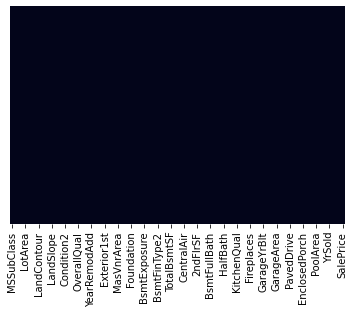

In [36]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False);
# sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [37]:
train.shape

(1460, 76)

## Datatype Check

In [38]:
for item in col:
    x = train[item].dtypes
    print(item,'=', x)

MSSubClass = int64
MSZoning = object
LotFrontage = float64
LotArea = int64
Street = object
LotShape = object
LandContour = object
Utilities = object
LotConfig = object
LandSlope = object
Neighborhood = object
Condition1 = object
Condition2 = object
BldgType = object
HouseStyle = object
OverallQual = int64
OverallCond = int64
YearBuilt = int64
YearRemodAdd = int64
RoofStyle = object
RoofMatl = object
Exterior1st = object
Exterior2nd = object
MasVnrType = object
MasVnrArea = float64
ExterQual = object
ExterCond = object
Foundation = object
BsmtQual = object
BsmtCond = object
BsmtExposure = object
BsmtFinType1 = object
BsmtFinSF1 = int64
BsmtFinType2 = object
BsmtFinSF2 = int64
BsmtUnfSF = int64
TotalBsmtSF = int64
Heating = object
HeatingQC = object
CentralAir = object
Electrical = object
1stFlrSF = int64
2ndFlrSF = int64
LowQualFinSF = int64
GrLivArea = int64
BsmtFullBath = int64
BsmtHalfBath = int64
FullBath = int64
HalfBath = int64
BedroomAbvGr = int64
KitchenAbvGr = int64
KitchenQual

In [39]:
col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [45]:
print(train['FireplaceQu'].dtype)

object


### Seperate categorical feature for encoding

In [47]:
cat_col = []

for item in col:
    if train[item].dtype == 'object':
        cat_col.append(item)


In [49]:
len(cat_col)

39

### Make a function for encode all the categorical columns

In [52]:
dummies = pd.get_dummies(train[cat_col])

In [54]:
dummies.shape

(1460, 239)

In [55]:
train.shape

(1460, 76)

In [56]:
demo_train = train

In [60]:
demo_train.drop(cat_col,axis=1,inplace=True)

In [100]:
new_train = pd.concat([demo_train,dummies], axis=1)

In [101]:
new_train.shape

(1460, 276)

In [102]:
new_train = new_train.loc[:,~new_train.columns.duplicated()]

In [104]:
new_train.shape

(1460, 276)

In [105]:
new_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [107]:
col = new_train.columns
for i in col:
    print(i)

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Grvl
Street_Pave
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_AllPub
Utilities_NoSeWa
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Gtl
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighbor

In [77]:
new_train.shape

(1460, 276)

In [75]:
x = new_train.drop(['SalePrice'],axis=1)

In [76]:
y = new_train['SalePrice']

In [69]:
from sklearn.model_selection import train_test_split

In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = .2, random_state = 1)

In [109]:
from sklearn.linear_model import LinearRegression


In [110]:
model = LinearRegression()

In [111]:
model.fit(xtrain, ytrain)

LinearRegression()

In [112]:
model.score(xtest,ytest)

-1719931178.9484308

In [113]:
ytest

258     231500
267     179500
288     122000
649      84500
1233    142000
         ...  
163     103200
47      249700
1432     64500
98       83000
409     339750
Name: SalePrice, Length: 292, dtype: int64

In [94]:
model.predict(xtest)

array([ 2.14067904e+05,  1.61634151e+05,  1.08727015e+05,  6.93548431e+04,
        1.29745214e+05,  3.59557008e+05,  3.09071344e+05,  1.41755461e+05,
        2.07512201e+05,  2.46426857e+05,  1.83776462e+05,  4.54301755e+09,
        1.95292712e+05,  3.83599038e+05,  2.41280445e+05,  1.07591033e+05,
        9.78722998e+04,  1.05006528e+05,  6.39140046e+09,  1.05721632e+05,
        1.25290691e+05,  1.33251087e+05,  2.61257160e+05,  3.87199487e+05,
        9.37024276e+04,  2.25197593e+05,  1.06263870e+05,  1.81762355e+05,
        4.51833769e+05,  1.20765172e+05,  1.50817082e+05,  1.25865220e+05,
        1.24813894e+05,  7.67488933e+04,  1.65261701e+05,  3.63068524e+05,
        1.27416262e+05,  8.06848220e+04,  2.57034258e+05,  1.12392971e+05,
        1.38806152e+05,  1.32851807e+05,  5.91499144e+10,  1.29239484e+05,
        1.67685248e+05,  1.88597740e+05,  1.18536545e+05,  1.97223707e+05,
        2.28185644e+05,  2.74453781e+05,  1.06566021e+05,  2.69402128e+05,
        1.33052854e+05,  